<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png"
     width="200px"
     height="auto"/>
</p>



# <h1 align="center" id="heading">Phase I - Proof of Concept</h1>



## ☑️ Objectives
At the end of this session, you will have a brief understanding of how to:
- [ ] Find and run pre-trained models (Phase I)
- [ ] Evaluate results from pre-trained models (Phase I)
- [ ] Run a pre-trained model using real Reddit data (Phase I)


## 🛠️ Pre-Assignment
1. Create a virtual environment with 🐍 conda : `conda env create -f environment.yml`

2. Activate your conda virtual environment: `conda activate tsla_bot`

3. Create a .env file in the root directory and add the following variables:
4. 
   `STOCK_API_KEY` : API key from [twelvedata](https://twelvedata.com/pricing)

   `REDDIT_API_CLIENT_ID` : client ID of your reddit app
   
   `REDDIT_API_CLIENT_SECRET`: client secret of your reddit app
   
   Follow this tutorial to generate your own Reddit credentials:
   <https://www.jcchouinard.com/get-reddit-api-credentials-with-praw/>

4. Continue in this notebook



## Background


After the meeting with your boss, and reviewing your [notes](https://www.notion.so/Analyzing-Market-Sentiment-Phase-I-II-and-II-End-to-End-MLOps-with-Open-Source-Tools-dc4b846108b44f6bb2962d550368560c#54cc350bc95041ee873dabde36930af1) 📓, you're ready to get going on a Proof of Concept (POC)

A POC tests the validity of your hypothesis. It's a way to prove that your idea, task, app, or whatever else works!

There's no time to waste - you've got an idea - it's time to get testing it out! 🏁

### Step 1: Initial Imports and Variable Setting 📈

First things first: Let's set some variables that will help us going forward.

Though your boss suggested `"TSLA"`, you can use any active stock-symbol and subreddit!

**IMPORTANT**: Make sure you verify that your selected subreddit exists by navigating to the generated link after you run the following cell

In [1]:
from datetime import datetime, timedelta

### START CODE HERE

# Stock data to grab ex. "TSLA"
symbol = 'TSLA'

# subreddit to check
subreddit = 'TSLA'

# Time interval granularity
# valid choices are "1week", "1month", "1day"
interval = '1day'

# set the beginning and end of the time range you'd like to analyze
# ensure you use the format "YYYY-MM-DD"
start_date ='2022-01-01'
end_date = '2022-07-06'

### END CODE HERE

start_date_dt = datetime.strptime(start_date, '%Y-%m-%d')
end_date_dt = datetime.strptime(end_date, '%Y-%m-%d')

print(f'reddit.com/r/{subreddit}')

reddit.com/r/TSLA


In order to make sure we can import our `BotUtils.py`, we have to ensure we're running from the `TSLASentimentAnalyzer` folder. To do this, we can `cd` into that directory!

In [2]:
!pwd

/home/dnautiyal/dev/code/IntroToMLOps/Week-1/Phase_I-Proof_of_concept


In [3]:
!cd TSLASentimentAnalyzer

### Step 2: Set Environment Variables ⛰️

Use the information you created in the instructions of the `README.md` to fill in the values below!

In [4]:
# define env variables for configuration
import os
from dotenv import load_dotenv

load_dotenv()

True

### Step 3: Get to Scraping 🌐

Now we're going to use the `scraper` module (found in the `TSLASentimentAnalyzer` folder) to "scrape" the subreddit of our choosing for posts!

⚗️ RESOURCES: 

[Web Scraping](https://www.parsehub.com/blog/what-is-web-scraping/)

[Reddit Post Options](https://www.reddit.com/r/help/comments/32eu8w/what_is_the_difference_between_newrising_hot_top/)

##### Initializing the Scraper

In [5]:
import pandas as pd
from loguru import logger
from TSLASentimentAnalyzer.classifier import predict
from TSLASentimentAnalyzer.scraper import RedditScraper
from TSLASentimentAnalyzer.config import settings

# instantiating the reddit scraper
reddit = RedditScraper()### YOUR LINE OF CODE HERE

##### Helper Functions 🔨

Here are some helper functions to assist in collecting data!

In [12]:
from collections.abc import Callable
def load_data(number: int, scraping_option: Callable):
    '''
    loads comments from reddit using the RedditScraper using one of the options
    and returns a DataFrame
    '''
    comments = []
    for submission in scraping_option(number):
        comments.extend(reddit.get_comment_forest(submission.comments))
        logger.debug(
            submission.title,
            submission.num_comments,
            len(reddit.get_comment_forest(submission.comments)),
        )
    df = pd.DataFrame(comments)
    return df


def select_scrap_type(option: str):
    '''
    selects a method from the reddit object based on a given option
    '''
    if option == "Hot":
        return reddit.get_hot
        
    if option == "Rising":
        return reddit.get_rising

    if option == "New":
        return reddit.get_new

##### Loading & Processing the Reddit Comment Data

Let's scrape the 15 🔥 hottest 🔥 posts from your selected subreddit using the `load_data()` helper function!

In [13]:
# Scraping data from reddit
dfReddit = load_data(number=15, scraping_option =select_scrap_type("Hot"))### YOUR LINE OF CODE HERE

2022-07-08 20:05:15.298 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x7f2f040aea60>
2022-07-08 20:05:15.299 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x7f2f040aea60>
2022-07-08 20:05:15.299 | DEBUG    | __main__:load_data:10 - Musk backs out of Twitter deal. Why no action in this sub of 13000 people?
2022-07-08 20:05:21.443 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x7f2e9f96b8b0>
2022-07-08 20:05:21.444 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x7f2e9f96b8b0>
2022-07-08 20:05:21.445 | DEBUG    | __main__:load_data:10 - TSLA Sentiment Up on Musk Children and Twitter News
2022-07-08 20:05:25.075 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_for

Once we have our comments, let's use the [`pandas.Series.str.slice()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.slice.html) method to ensure our data will play nicely with our model. (`bert` only supports up to a maximum of 512 tokens, so a range of `0` to `512` seems appropriate)

In [15]:
# slice comments as bert supports only 512 tokens
dfReddit['comment'] = dfReddit['comment'].str.slice(0,512)### YOUR LINE OF CODE HERE

### Step 5: Analyze the Comments! 🔍


We'll be using the `FourthBrain/bert_model_reddit_tsla` model (found [here](https://huggingface.co/FourthBrain/bert_model_reddit_tsla)), which is based off of the `distilbert-base-uncased` (found [here](https://huggingface.co/distilbert-base-uncased))

We'll use this model in a `sentiment-analysis` pipeline! (read all about that [here](https://huggingface.co/docs/transformers/main_classes/pipelines#transformers.pipeline.example))

In [16]:
from transformers import pipeline

# initialize the sentiment pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model='FourthBrain/bert_model_reddit_tsla') ### YOUR LINE OF CODE HERE


reddit_json = sentiment_pipeline(dfReddit["comment"].tolist())

# Retrieve labels and scores
dfReddit['label'] = [reddit_json[i]['label'] for i in range(0, len(reddit_json))]
dfReddit['score'] = [reddit_json[i]['score'] for i in range(0, len(reddit_json))]


2022-07-08 20:07:08.475759: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Next up, we'll want to perform the following steps

1. Convert the `created_at` column to the appropriate format and name it `'timestamp'`
2. Normalize the dates using the `NormalizeDates()` helper function

In [17]:
import numpy as np
from BotUtils import NormalizeDates

# Rename timestamp column 
dfReddit = dfReddit.rename(columns={'created_at': 'timestamp'})
dfReddit['timestamp'] = [datetime.fromtimestamp(dt) for dt in dfReddit['timestamp'] ]

# Normalize Reddit sentiment data
dfReddit = NormalizeDates(dfReddit, timestamp_col="timestamp", interval=interval)

# Create a continous time series 
dfTimeSeries = pd.DataFrame(dfReddit["timestamp"])

### Step 6: Get Stock Data 🚀

Next up, we're going to get the stock data and create a DataFrame - as well as normalize the dates, just like we did with the subreddit comment timestamps

In [18]:
from BotUtils import GetStockData

# Get Stock Data
j, dfStockData = GetStockData(settings.stock_data_api_key, symbol=symbol, start_date=start_date, end_date=end_date, interval='1day')
dfStockData = dfStockData[(dfStockData['timestamp'] >= start_date) & (dfStockData['timestamp'] <= end_date)]

# Normalize stock price data
dfStockData = NormalizeDates(dfStockData, timestamp_col="timestamp", interval=interval)

### Step 7: Merge Sentiment and Stock Data 🧬

We've got some processing to do! 

In [19]:
# Join time series df with stock price df and reddit df
dfSentiment = dfTimeSeries.merge(dfStockData, how='left', on="timestamp")
dfSentiment = dfSentiment.merge(dfReddit, how='left', on="timestamp")

# Filter down to only the columns that we'll be using 
dfSentiment = dfSentiment[['timestamp', 'close', 'volume', 'label', 'score']]

# Clean up NaNs for closing price, score, and labels
dfSentiment['close'] = dfSentiment['close'].fillna(0)
dfSentiment['score'] = dfSentiment['score'].fillna(0)
dfSentiment['label'] = dfSentiment['label'].fillna('NEUTRAL')
dfSentiment['label'] = ['NEGATIVE' for s in dfSentiment['label'] == 'LABEL_0']
dfSentiment['label'] = ['POSITIVE' for s in dfSentiment['label'] == 'LABEL_1']

# Convert close from string to float
dfSentiment['close'] = dfSentiment['close'].astype('float')

# Calculate weighted sentiment
dfSentiment['sentiment'] = [1 if sentiment == "POSITIVE"  else 0 if sentiment == "NEUTRAL" else -1 for sentiment in dfSentiment['label'].tolist() ]
dfSentiment['weighted_sentiment'] = dfSentiment['sentiment'] * dfSentiment['score']

# Count only the POSITIVE and NEGATIVE labels (NEUTRAL is just a filler for missing dates)
dfSentiment['counter'] = [1 if sentiment == "POSITIVE"  else 1 if sentiment == "NEGATIVE" else 0 for sentiment in dfSentiment['label'].tolist() ]

# Group by to calculate Reddit post count and sentiment score (mean of weighted sentiment)
dfSentiment = dfSentiment.groupby('timestamp') \
       .agg({'counter':'sum', 'close':'max', 'volume':max, 'weighted_sentiment':'mean'}) \
       .rename(columns={'sentiment':'count_posts', 'weighted_sentiment':'sentiment_score'}) \
       .reset_index()


In [20]:
dfSentiment

,timestamp,counter,close,volume,sentiment_score
0,2022-06-30,64,673.41998,31533500,0.852949
1,2022-07-01,81,681.78998,24781500,0.864678
2,2022-07-02,361,0.00000,NaN,0.833952
3,2022-07-03,289,0.00000,NaN,0.888422
4,2022-07-04,784,0.00000,NaN,0.919358
5,2022-07-05,4,699.20001,28193700,0.989242
6,2022-07-06,289,695.20001,23951200,0.904416
7,2022-07-07,16,0.00000,NaN,0.954973
8,2022-07-08,64,0.00000,NaN,0.920198


### Step 8: Final Computation 🖥️

In this last step, we're going to finish up some calculations:

1. Create the lags and percentage change for the closing stock price. 
2. Calculate the 3 month rolling average.

In [21]:
# Create lags and %change for closing stock price
dfSentiment['close_lag1'] = dfSentiment['close'].shift(1)
dfSentiment['close_lag1'] = dfSentiment['close_lag1'].fillna(0)
dfSentiment['perc_change_close'] = (dfSentiment['close'] - dfSentiment['close_lag1']) / dfSentiment['close_lag1']
dfSentiment['perc_change_close'] = dfSentiment['perc_change_close'].fillna(0)

dfSentiment['sentiment_score_lag1'] = dfSentiment['sentiment_score'].shift(1)
dfSentiment['sentiment_score_lag1'] = dfSentiment['sentiment_score_lag1'].fillna(0)
dfSentiment['perc_change_sentiment'] = (dfSentiment['sentiment_score'] - dfSentiment['sentiment_score_lag1']) / dfSentiment['sentiment_score_lag1']

# Calculate 3 month rolling average
dfSentiment['sentiment_SMA3mo'] = dfSentiment.sentiment_score.rolling(3).mean()
dfSentiment['sentiment_SMA3mo'] = dfSentiment['sentiment_SMA3mo'].fillna(0)

dfSentiment = dfSentiment[1:]
dfSentiment

,timestamp,counter,close,volume,sentiment_score,close_lag1,perc_change_close,sentiment_score_lag1,perc_change_sentiment,sentiment_SMA3mo
1,2022-07-01,81,681.78998,24781500,0.864678,673.41998,0.012429,0.852949,0.013751,0.000000
2,2022-07-02,361,0.00000,NaN,0.833952,681.78998,-1.000000,0.864678,-0.035535,0.850526
3,2022-07-03,289,0.00000,NaN,0.888422,0.00000,0.000000,0.833952,0.065316,0.862351
4,2022-07-04,784,0.00000,NaN,0.919358,0.00000,0.000000,0.888422,0.034822,0.880577
5,2022-07-05,4,699.20001,28193700,0.989242,0.00000,inf,0.919358,0.076013,0.932341
6,2022-07-06,289,695.20001,23951200,0.904416,699.20001,-0.005721,0.989242,-0.085748,0.937672
7,2022-07-07,16,0.00000,NaN,0.954973,695.20001,-1.000000,0.904416,0.055900,0.949544
8,2022-07-08,64,0.00000,NaN,0.920198,0.00000,0.000000,0.954973,-0.036415,0.926529


Let's save our work in a `.csv` for use later in the Streamlit app!

In [22]:
# Save DataFrame locally (or somewhere else) for use in Streamlit app
dfSentiment.to_csv('./sentiment_data.csv')

### Step 8a: Plotting our Results! 📊

Now, after all that, let's plot our results and see how they shape up!

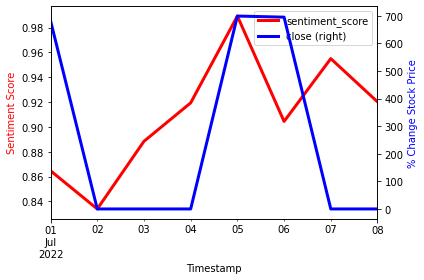

In [23]:
import matplotlib.pyplot as plt

ax1 = dfSentiment.plot(kind = 'line', x = 'timestamp',
                  y = 'sentiment_score', color = 'Red',
                  linewidth = 3)

ax2 = dfSentiment.plot(kind = 'line', x = 'timestamp',
                   y = 'close', secondary_y = True,
                   color = 'Blue',  linewidth = 3,
                   ax = ax1) 

#labeling x and y-axis
ax1.set_xlabel('Timestamp', color = 'black')
ax1.set_ylabel('Sentiment Score', color = "r")
ax2.set_ylabel('% Change Stock Price', color = 'b')
 
#defining display layout
plt.tight_layout()
 
#show plot
plt.show()